# Selec data 
In the3 notebook we selec the data of twitter for the HGC artticle de data selected are going to be the Metropolitan area of Toluca, Pachuca, Puebla , Cuernavaca, and Mexico City. Using a determin bounding box the twitts are selected from all the country. 

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import geopandas as gpd
import seaborn as sns
from HierarchicalGeoClustering import TreeClusters, Clustering 
import shapely 
from matplotlib import cm
import pandas as pd
import warnings
import contextily as ctx
warnings.filterwarnings('ignore')

/home/miguel/anaconda3/envs/article_HGC/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
x_max = -98.029217
x_min = -99.842997
y_max = 20.252942
y_min = 18.755623

In [3]:
### Load the data and clean
df_twitter_geo = pd.read_csv('../data/data-1591295328886.csv')

In [4]:
df_twitter_geo.head()

,x,y,uname,fecha,hora,fecha_hora,intervalo
0,-99.651350,19.307965,paulessus,2015-01-12,18:02:02,2015-01-12 18:02:02-06,mon.04
1,-98.282270,19.053108,iLiliw,2015-01-12,18:02:46,2015-01-12 18:02:46-06,mon.04
2,-99.124897,19.431973,muy_abigail,2015-01-12,18:20:18,2015-01-12 18:20:18-06,mon.04
3,-98.365444,20.101399,sibilajuiz,2015-01-12,18:51:38,2015-01-12 18:51:38-06,mon.04
4,-99.621923,19.248558,Viole25,2015-01-12,19:55:26,2015-01-12 19:55:26-06,mon.05


In [5]:
df_twitter_geo

,x,y,uname,fecha,hora,fecha_hora,intervalo
0,-99.651350,19.307965,paulessus,2015-01-12,18:02:02,2015-01-12 18:02:02-06,mon.04
1,-98.282270,19.053108,iLiliw,2015-01-12,18:02:46,2015-01-12 18:02:46-06,mon.04
2,-99.124897,19.431973,muy_abigail,2015-01-12,18:20:18,2015-01-12 18:20:18-06,mon.04
3,-98.365444,20.101399,sibilajuiz,2015-01-12,18:51:38,2015-01-12 18:51:38-06,mon.04
4,-99.621923,19.248558,Viole25,2015-01-12,19:55:26,2015-01-12 19:55:26-06,mon.05
...,...,...,...,...,...,...,...
5415822,-99.183897,19.358787,LuisFernando_GR,2015-04-10,08:10:43,2015-04-10 08:10:43-05,fri.01
5415823,-99.184341,19.484078,Amezquita54,2015-04-10,08:10:44,2015-04-10 08:10:44-05,fri.01
5415824,-99.142916,19.277854,mamesa75,2015-04-10,08:10:45,2015-04-10 08:10:45-05,fri.01
5415825,-99.160336,19.423050,entucamaydedog,2015-04-10,08:10:49,2015-04-10 08:10:49-05,fri.01


In [6]:
df_twitter_geo[(df_twitter_geo['x'] >=  x_min) &  (df_twitter_geo['x']< x_max)  ]

,x,y,uname,fecha,hora,fecha_hora,intervalo
0,-99.651350,19.307965,paulessus,2015-01-12,18:02:02,2015-01-12 18:02:02-06,mon.04
1,-98.282270,19.053108,iLiliw,2015-01-12,18:02:46,2015-01-12 18:02:46-06,mon.04
2,-99.124897,19.431973,muy_abigail,2015-01-12,18:20:18,2015-01-12 18:20:18-06,mon.04
3,-98.365444,20.101399,sibilajuiz,2015-01-12,18:51:38,2015-01-12 18:51:38-06,mon.04
4,-99.621923,19.248558,Viole25,2015-01-12,19:55:26,2015-01-12 19:55:26-06,mon.05
...,...,...,...,...,...,...,...
5415822,-99.183897,19.358787,LuisFernando_GR,2015-04-10,08:10:43,2015-04-10 08:10:43-05,fri.01
5415823,-99.184341,19.484078,Amezquita54,2015-04-10,08:10:44,2015-04-10 08:10:44-05,fri.01
5415824,-99.142916,19.277854,mamesa75,2015-04-10,08:10:45,2015-04-10 08:10:45-05,fri.01
5415825,-99.160336,19.423050,entucamaydedog,2015-04-10,08:10:49,2015-04-10 08:10:49-05,fri.01


In [7]:
df_twitter_geo[(df_twitter_geo['y'] >=  y_min) &  (df_twitter_geo['y']< y_max)  ]

,x,y,uname,fecha,hora,fecha_hora,intervalo
0,-99.651350,19.307965,paulessus,2015-01-12,18:02:02,2015-01-12 18:02:02-06,mon.04
1,-98.282270,19.053108,iLiliw,2015-01-12,18:02:46,2015-01-12 18:02:46-06,mon.04
2,-99.124897,19.431973,muy_abigail,2015-01-12,18:20:18,2015-01-12 18:20:18-06,mon.04
3,-98.365444,20.101399,sibilajuiz,2015-01-12,18:51:38,2015-01-12 18:51:38-06,mon.04
4,-99.621923,19.248558,Viole25,2015-01-12,19:55:26,2015-01-12 19:55:26-06,mon.05
...,...,...,...,...,...,...,...
5415822,-99.183897,19.358787,LuisFernando_GR,2015-04-10,08:10:43,2015-04-10 08:10:43-05,fri.01
5415823,-99.184341,19.484078,Amezquita54,2015-04-10,08:10:44,2015-04-10 08:10:44-05,fri.01
5415824,-99.142916,19.277854,mamesa75,2015-04-10,08:10:45,2015-04-10 08:10:45-05,fri.01
5415825,-99.160336,19.423050,entucamaydedog,2015-04-10,08:10:49,2015-04-10 08:10:49-05,fri.01


Son minimos los eliminados  vamos a dejarlo asi y vamos a tomar una muestra 


In [8]:
df_twitter_geo= df_twitter_geo.drop_duplicates(subset = ['x', 'y'])

In [9]:
df_twi_geo_cut=  df_twitter_geo.sample(30000)

In [10]:
# del df_twitter_geo

In [11]:
orig_min_x =df_twi_geo_cut['x'].min()
orig_max_x =df_twi_geo_cut['x'].max()
orig_min_y =df_twi_geo_cut['y'].min()
orig_max_y =df_twi_geo_cut['y'].max()

In [12]:
print(orig_min_x)
print(orig_max_x)
print(orig_min_y)
print(orig_max_y)

-99.936493
-97.562911
18.347067
20.329329


In [13]:
df_twi_geo_cut['x_trans'] = (df_twi_geo_cut['x']- orig_min_x)/(orig_max_x- orig_min_x)
df_twi_geo_cut['y_trans'] = (df_twi_geo_cut['y']- orig_min_y)/(orig_max_y- orig_min_y)

In [14]:
df_twi_geo_cut.head()

,x,y,uname,fecha,hora,fecha_hora,intervalo,x_trans,y_trans
1015730,-99.136280,19.417392,matavirgenes_,2014-12-02,14:02:50,2014-12-02 14:02:50-06,tue.03,0.337133,0.539951
4393097,-99.142548,19.460124,andreeabarr,2015-03-15,10:54:57,2015-03-15 09:54:57-06,sun.01,0.334492,0.561509
538578,-99.096008,19.474858,_FridaSincro,2014-11-11,20:00:53,2014-11-11 20:00:53-06,tue.05,0.354100,0.568941
5051660,-99.167021,19.358796,Mirrimiau_,2015-04-01,10:57:59,2015-04-01 09:57:59-06,wed.01,0.324182,0.510391
5375325,-98.237185,19.064196,SmoKKey13,2015-04-09,08:11:14,2015-04-09 08:11:14-05,thu.01,0.715926,0.361773


In [15]:
data_arr= df_twi_geo_cut[['x_trans', 'y_trans']].to_numpy()

In [16]:
dic_points={'points':[data_arr], 'parent':''}

In [17]:
levels_cluster= 5
tree_Natural_c = Clustering.recursive_clustering_tree(
                        dic_points,
                        levels_clustering = levels_cluster,
                        algorithm = 'natural_cities'
                )

In [18]:

tree_DBSCAN = Clustering.recursive_clustering_tree(
                        dic_points,
                        levels_clustering = levels_cluster,
                        algorithm = 'dbscan'
                )

In [19]:

tree_HDBSCAN = Clustering.recursive_clustering_tree(
                        dic_points,
                        levels_clustering = levels_cluster,
                        algorithm = 'hdbscan'
                )

In [20]:
tree_OPTICS= Clustering.recursive_clustering_tree(
                        dic_points,
                        levels_clustering = levels_cluster,
                        algorithm = 'optics'
                )

In [21]:
tree_knee = Clustering.recursive_clustering_tree(
                    dic_points,
                    levels_clustering = levels_cluster,
                    algorithm = 'adaptative_DBSCAN'
                )

The min_k value is too large for the number of points returns empty clusters
min_k reset to obtain at least 1 value
The min_k value is too large for the number of points returns empty clusters
The min_k value is too large for the number of points returns empty clusters
The min_k value is too large for the number of points returns empty clusters
The min_k value is too large for the number of points returns empty clusters
The min_k value is too large for the number of points returns empty clusters


In [22]:
def node_translate(node, x_off, y_off, a=1, b=0, d=0,e=1):
    """
    Translate the node and ite point and there children
    """
    point_trans_x= x_off
    point_trans_y= y_off
    matrix_trans = [a, b ,d, e, point_trans_x, point_trans_y]
    new_points= [shapely.affinity.affine_transform(i,matrix_trans) for i in node.point_cluster_noise  ]
    node.point_cluster_noise = new_points           
    
    node.polygon_cluster = shapely.affinity.affine_transform(node.polygon_cluster,
                                                    matrix_trans
                                                    )
    # node.center = shapely.affinity.affine_transform(node.center,
    #                                          matrix_trans
    #                                         )
    for i in node.children:
        node_translate(i, x_off, y_off, a=a, b= b, d=d,e=e)
    
    return

In [23]:
def tree_translate_affine(tree_original, x_off, y_off, a=1, b=0, d=0,e=1):
    """
    Translate the tree 
    """
    node_translate(tree_original.root,  x_off, y_off, a=a, b=b, d=d,e=e)
    return

In [24]:
def un_normalize(tree_un,x_min, y_min, x_max, y_max ):
    """
    
    """
    ##### Si la normalización se hizo salvaje entonces 
    b=0
    d=0
    ####3
    a = (x_max - x_min)
    x_off = x_min
    e = (y_max - y_min)
    y_off = y_min
    tree_translate_affine(tree_un,x_off , y_off, a=a, b=b, d=d, e=e)    
    


In [25]:
un_normalize(tree_Natural_c, orig_min_x, orig_min_y , orig_max_x , orig_max_y)

In [26]:
def get_geopandas_tree_polygon(tree_geo):
    """
    Create a geopandas with the polygons from the tree
    """
    list_dic=[]
    for i , level_nodes in enumerate(tree_geo.levels_nodes):
        # levels_nodes= tree_geo.get_level(i)
        # print(level_nodes)
        for node in level_nodes:
            
            if node.parent == None:
                parent = ''
            else:
                parent = node.parent.name
            list_dic.append({'Polygon': node.polygon_cluster,
                             'name': node.name,
                             'level': i,
                             'parent': parent})
    return gpd.GeoDataFrame(list_dic)
    # return list_dic

In [27]:
geo_Natural_c= get_geopandas_tree_polygon(tree_Natural_c)

In [28]:
geo_Natural_c.head()

,Polygon,name,level,parent
0,"POLYGON ((-98.457528 18.593013, -98.578205 18....",_L_0_l_0_c_0,0,
1,"POLYGON ((-97.732014 18.877189, -97.73176 18.8...",_L_0_l_0_c_0_L_1_l_0_c_0,1,_L_0_l_0_c_0
2,"POLYGON ((-97.760069 19.216778, -97.76018 19.2...",_L_0_l_0_c_0_L_1_l_0_c_1,1,_L_0_l_0_c_0
3,"POLYGON ((-97.907114 19.32409, -97.907176 19.3...",_L_0_l_0_c_0_L_1_l_0_c_2,1,_L_0_l_0_c_0
4,"POLYGON ((-97.918108 19.314027, -97.919279 19....",_L_0_l_0_c_0_L_1_l_0_c_3,1,_L_0_l_0_c_0


In [29]:
geo_Natural_c.set_geometry('Polygon', inplace=True)

In [30]:
geo_Natural_c.set_crs(4326, inplace =True, allow_override=True)

,Polygon,name,level,parent
0,"POLYGON ((-98.45753 18.59301, -98.57820 18.521...",_L_0_l_0_c_0,0,
1,"POLYGON ((-97.73201 18.87719, -97.73176 18.882...",_L_0_l_0_c_0_L_1_l_0_c_0,1,_L_0_l_0_c_0
2,"POLYGON ((-97.76007 19.21678, -97.76018 19.216...",_L_0_l_0_c_0_L_1_l_0_c_1,1,_L_0_l_0_c_0
3,"POLYGON ((-97.90711 19.32409, -97.90718 19.324...",_L_0_l_0_c_0_L_1_l_0_c_2,1,_L_0_l_0_c_0
4,"POLYGON ((-97.91811 19.31403, -97.91928 19.313...",_L_0_l_0_c_0_L_1_l_0_c_3,1,_L_0_l_0_c_0
...,...,...,...,...
5778,"POLYGON ((-99.66510 19.28096, -99.66507 19.281...",_L_0_l_0_c_0_L_1_l_0_c_535_L_2_l_535_c_17_L_3_...,5,_L_0_l_0_c_0_L_1_l_0_c_535_L_2_l_535_c_17_L_3_...
5779,"POLYGON ((-99.67884 19.28004, -99.67873 19.280...",_L_0_l_0_c_0_L_1_l_0_c_535_L_2_l_535_c_17_L_3_...,5,_L_0_l_0_c_0_L_1_l_0_c_535_L_2_l_535_c_17_L_3_...
5780,"POLYGON ((-99.67951 19.27987, -99.67954 19.279...",_L_0_l_0_c_0_L_1_l_0_c_535_L_2_l_535_c_17_L_3_...,5,_L_0_l_0_c_0_L_1_l_0_c_535_L_2_l_535_c_17_L_3_...
5781,"POLYGON ((-99.65503 19.27580, -99.65464 19.274...",_L_0_l_0_c_0_L_1_l_0_c_535_L_2_l_535_c_20_L_3_...,5,_L_0_l_0_c_0_L_1_l_0_c_535_L_2_l_535_c_20_L_3_...


In [31]:
geo_Natural_c.to_pickle('../output/Natural_C_poly.pickle')

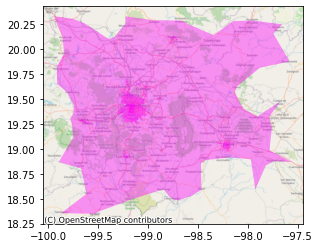

In [32]:
axs= geo_Natural_c.plot(alpha=0.4, color='magenta')
ctx.add_basemap(axs, source=ctx.providers.OpenStreetMap.Mapnik, crs=geo_Natural_c.crs)

In [33]:
### adaptative
un_normalize(tree_knee, orig_min_x, orig_min_y , orig_max_x , orig_max_y)

In [34]:
#### OPTICS
un_normalize(tree_OPTICS, orig_min_x, orig_min_y , orig_max_x , orig_max_y)

In [35]:
#### HDBSCAN
un_normalize(tree_HDBSCAN, orig_min_x, orig_min_y , orig_max_x , orig_max_y)

In [36]:
geo_adaptative= get_geopandas_tree_polygon(tree_knee)
geo_HDBSCAN= get_geopandas_tree_polygon(tree_HDBSCAN)
geo_OPTICS= get_geopandas_tree_polygon(tree_OPTICS)

In [37]:
geo_adaptative.set_geometry('Polygon', inplace=True)
geo_HDBSCAN.set_geometry('Polygon',inplace=True)
geo_OPTICS.set_geometry('Polygon', inplace=True)

In [38]:
geo_adaptative.set_crs(4326, inplace =True, allow_override=True)
geo_HDBSCAN.set_crs(4326, inplace =True, allow_override=True)
geo_OPTICS.set_crs(4326, inplace =True, allow_override=True)

,Polygon,name,level,parent
0,"POLYGON ((-98.45753 18.59301, -98.57820 18.521...",_L_0_l_0_c_0,0,
1,"POLYGON ((-99.13610 19.41699, -99.13621 19.416...",_L_0_l_0_c_0_L_1_l_0_c_0,1,_L_0_l_0_c_0
2,"POLYGON ((-99.13989 19.41786, -99.13999 19.417...",_L_0_l_0_c_0_L_1_l_0_c_1,1,_L_0_l_0_c_0
3,"POLYGON ((-99.14232 19.42246, -99.14012 19.421...",_L_0_l_0_c_0_L_1_l_0_c_2,1,_L_0_l_0_c_0
4,"POLYGON ((-99.13203 19.42008, -99.13211 19.420...",_L_0_l_0_c_0_L_1_l_0_c_3,1,_L_0_l_0_c_0
...,...,...,...,...
9559,"POLYGON ((-99.60208 18.55287, -99.60194 18.552...",_L_0_l_0_c_0_L_1_l_0_c_2249_L_2_l_2249_c_0_L_3...,5,_L_0_l_0_c_0_L_1_l_0_c_2249_L_2_l_2249_c_0_L_3...
9560,"POLYGON ((-99.60313 18.56235, -99.60324 18.562...",_L_0_l_0_c_0_L_1_l_0_c_2250_L_2_l_2250_c_0_L_3...,5,_L_0_l_0_c_0_L_1_l_0_c_2250_L_2_l_2250_c_0_L_3...
9561,"POLYGON ((-99.54295 18.35785, -99.53742 18.356...",_L_0_l_0_c_0_L_1_l_0_c_2251_L_2_l_2251_c_0_L_3...,5,_L_0_l_0_c_0_L_1_l_0_c_2251_L_2_l_2251_c_0_L_3...
9562,"POLYGON ((-98.02271 19.83777, -98.03253 19.837...",_L_0_l_0_c_0_L_1_l_0_c_2252_L_2_l_2252_c_0_L_3...,5,_L_0_l_0_c_0_L_1_l_0_c_2252_L_2_l_2252_c_0_L_3...


In [39]:
geo_adaptative.to_pickle('../output/adaptative.pickle')
geo_HDBSCAN.to_pickle('../output/HDBSCAN.pickle')
geo_OPTICS.to_pickle('../output/OPTICS.pickle')

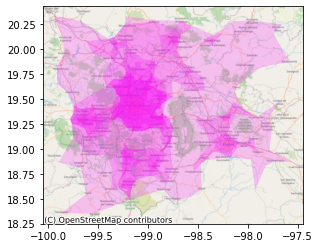

In [40]:
axs= geo_adaptative.plot(alpha=0.2, color='magenta')
ctx.add_basemap(axs, source=ctx.providers.OpenStreetMap.Mapnik, crs=geo_adaptative.crs)

In [44]:
max_ar = geo_adaptative[geo_adaptative.level == 2 ]['Polygon'].apply(lambda l: l.area).idxmax()

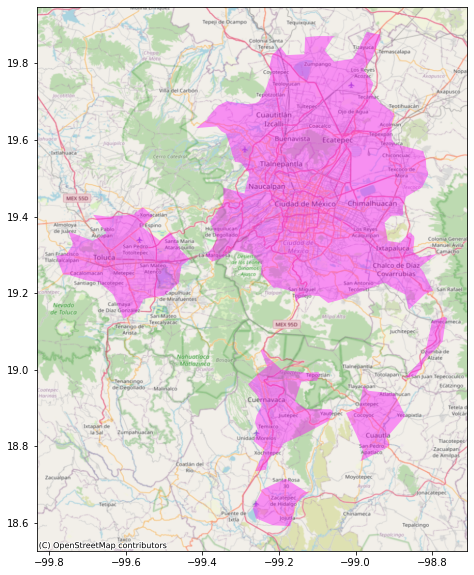

In [42]:
ax = geo_adaptative[(geo_adaptative.level == 3) & (geo_adaptative.parent== geo_adaptative.iloc[max_ar]['name'])].plot(figsize=(10,10), alpha=0.4, color='magenta' )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=geo_adaptative.crs)

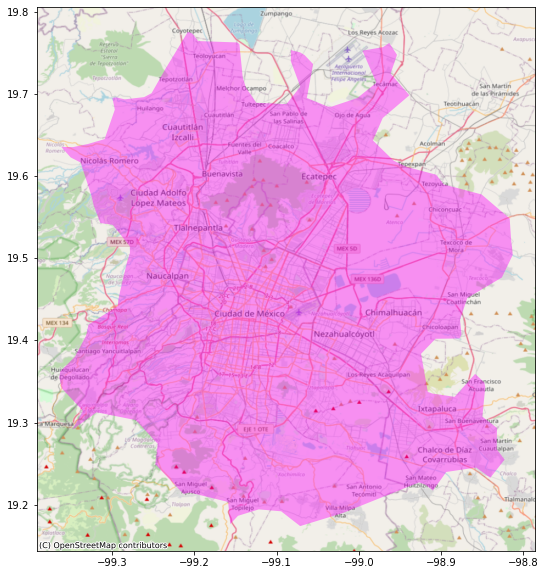

In [47]:
max_ar = geo_adaptative[geo_adaptative.level == 3 ]['Polygon'].apply(lambda l: l.area).idxmax()
ax = geo_adaptative[(geo_adaptative.level == 4) & (geo_adaptative.parent== geo_adaptative.iloc[max_ar]['name'])].plot(figsize=(10,10), alpha=0.4, color='magenta' )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=geo_adaptative.crs)

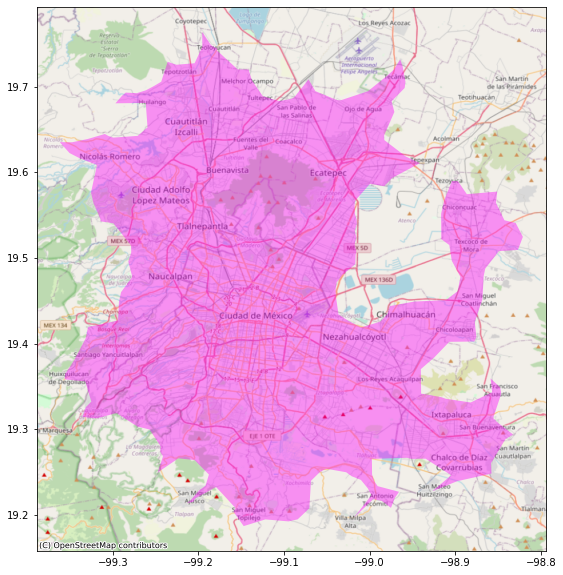

In [46]:
max_ar = geo_adaptative[geo_adaptative.level == 4 ]['Polygon'].apply(lambda l: l.area).idxmax()
ax = geo_adaptative[(geo_adaptative.level == 5) & (geo_adaptative.parent== geo_adaptative.iloc[max_ar]['name'])].plot(figsize=(10,10), alpha=0.4, color='magenta' )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=geo_adaptative.crs)